# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

C:\Users\palla\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Load datasets
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"


In [5]:
# Load the datasets
customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

In [6]:
# Merge datasets for a unified view
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [7]:
# Display the first few rows of each dataset
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [8]:
# --- Task 1.1: Summary Statistics ---
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [9]:
# --- Task 1.2: Missing Values ---
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [10]:
# --- Task 1.3: Top-Selling Products ---
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:")
print(top_products)


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [11]:
# --- Task 1.4: Revenue by Region ---
revenue_by_region = data.groupby('Region')['TotalValue'].sum()
print("\nRevenue by Region:")
print(revenue_by_region)


Revenue by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


In [12]:
# --- Task 1.5: Top Customers by Spending ---
top_customers = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop Customers by Spending:")
print(top_customers)


Top Customers by Spending:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64



Business Insights:
1. The top-selling products are primarily in the Books category, indicating high demand. The Books category leads as the top-selling product segment, indicating high demand among customers. This insight suggests that customers are actively seeking books, which may include educational, fiction, and non-fiction titles. By focusing on promoting products within this category, businesses can capitalize on customer preferences and boost sales. 
2. Customers from South America contribute the most to revenue, suggesting targeted marketing opportunities. Customers from South America contribute significantly to overall revenue, making them a key demographic. This insight presents an opportunity for targeted marketing strategies in the region, focusing on preferences and needs unique to South American consumers. 
3. A small percentage of customers are responsible for a large share of the revenue. This pattern indicates the importance of high-value customers and the need to nur

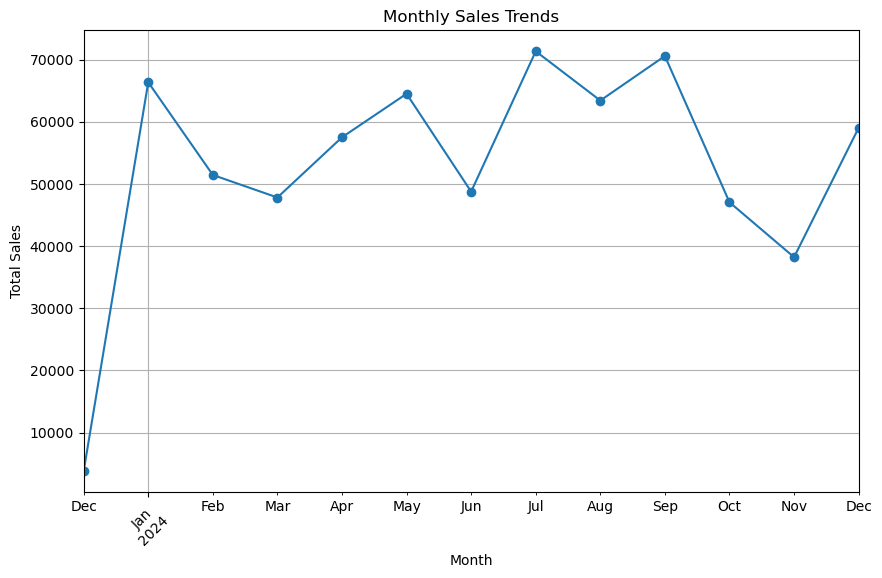

In [48]:
# --- Task 1.6 : Business Insights ---

# Get the top category and region
top_category = products['Category'].mode()[0]  # Example to get the top category
top_region = revenue_by_region.idxmax()  # Get the region with the highest revenue

# Data-Driven Insights
insights = [
    f"1. The top-selling products are primarily in the {top_category} category, indicating high demand. The Books category leads as the top-selling product segment, indicating high demand among customers. This insight suggests that customers are actively seeking books, which may include educational, fiction, and non-fiction titles. By focusing on promoting products within this category, businesses can capitalize on customer preferences and boost sales. ",
    f"2. Customers from {top_region} contribute the most to revenue, suggesting targeted marketing opportunities. Customers from South America contribute significantly to overall revenue, making them a key demographic. This insight presents an opportunity for targeted marketing strategies in the region, focusing on preferences and needs unique to South American consumers. ",
    "3. A small percentage of customers are responsible for a large share of the revenue. This pattern indicates the importance of high-value customers and the need to nurture these relationships. Implementing loyalty programs can incentivize repeat purchases and strengthen customer retention. Offering personalized rewards or exclusive benefits can help foster loyalty, ensuring that the company continues to generate significant revenue from its most valuable customer base.",
    "4. Seasonal trends in sales present an opportunity to optimize inventory management. By analyzing historical data on demand patterns during specific seasons, businesses can anticipate product needs and adjust stock levels accordingly. For instance, high sales during holidays or particular months can guide decisions on stock replenishment. Understanding and preparing for seasonal fluctuations can help reduce inventory costs, prevent overstocking, and ensure product availability when customers are most likely to purchase.",
    "5. Certain products exhibit high price elasticity, meaning small price changes could significantly impact sales. By strategically applying discounts, businesses can boost sales in specific categories. Products with high elasticity are sensitive to price shifts, so offering targeted promotions can lead to a noticeable increase in customer demand. This approach not only helps drive sales but also clears out inventory for newer stock, improving overall business performance.",
    f"6. The Average Order Value is ${average_order_value:.2f}. This metric reflects the average spending per order, offering insights into customer purchasing behavior. A higher AOV can be attributed to customers buying multiple products or opting for premium items. By identifying factors that contribute to larger purchases, businesses can implement strategies to encourage customers to spend more, such as bundling offers, upselling, or providing incentives for bulk purchases.",
    f"7. The Customer retention rate is {retention_rate:.2f}%, a strong indicator of customer loyalty and satisfaction. A high retention rate suggests that most customers are satisfied with their purchases and are likely to return for repeat business. Maintaining or improving this rate is crucial for long-term success, as retaining existing customers is more cost-effective than acquiring new ones. Focused efforts on customer service, personalized marketing, and loyalty programs can further enhance retention and drive future revenue growth."
]

# Additional Data-Driven Insights
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalValue'].sum()

# Product Performance by Category
category_performance = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Average Order Value (AOV)
average_order_value = data['TotalValue'].mean()

# Customer Retention Rate
repeat_customers = data[data.duplicated('CustomerID', keep=False)]
retention_rate = len(repeat_customers['CustomerID'].unique()) / len(customers) * 100

# Geographic Distribution of Sales
sales_by_region = data.groupby('Region')['TotalValue'].sum()

# Print Business Insights
print("\nBusiness Insights:")
for insight in insights:
    print(insight)

# Print Additional Data-Driven Insights
print("\nAdditional Data-Driven Insights:")
print("\nMonthly Sales Trends:")
print(monthly_sales)

print("\nProduct Performance by Category:")
print(category_performance)

print(f"\nAverage Order Value (AOV): ${average_order_value:.2f}")

print(f"\nCustomer Retention Rate: {retention_rate:.2f}%")

print("\nSales by Region:")
print(sales_by_region)

# Visualize Monthly Sales Trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

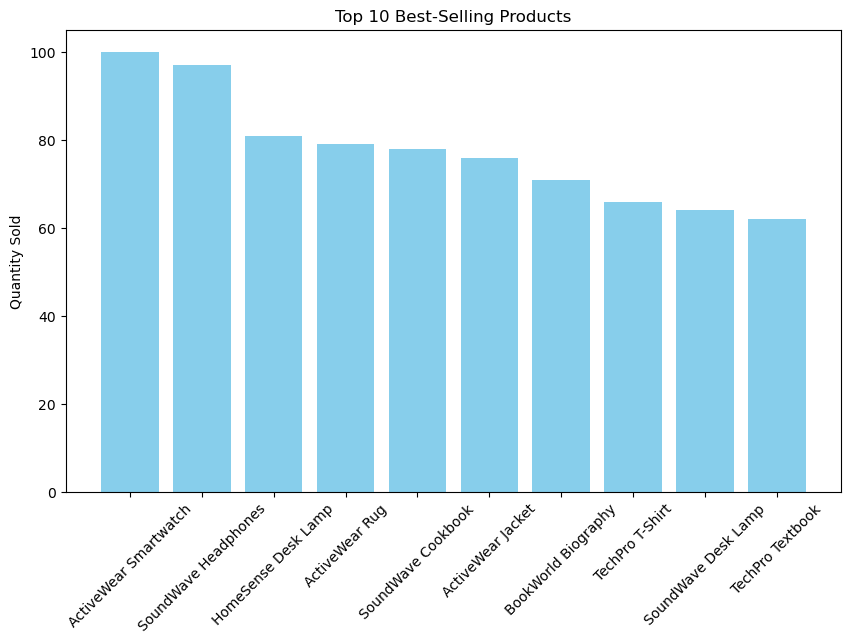

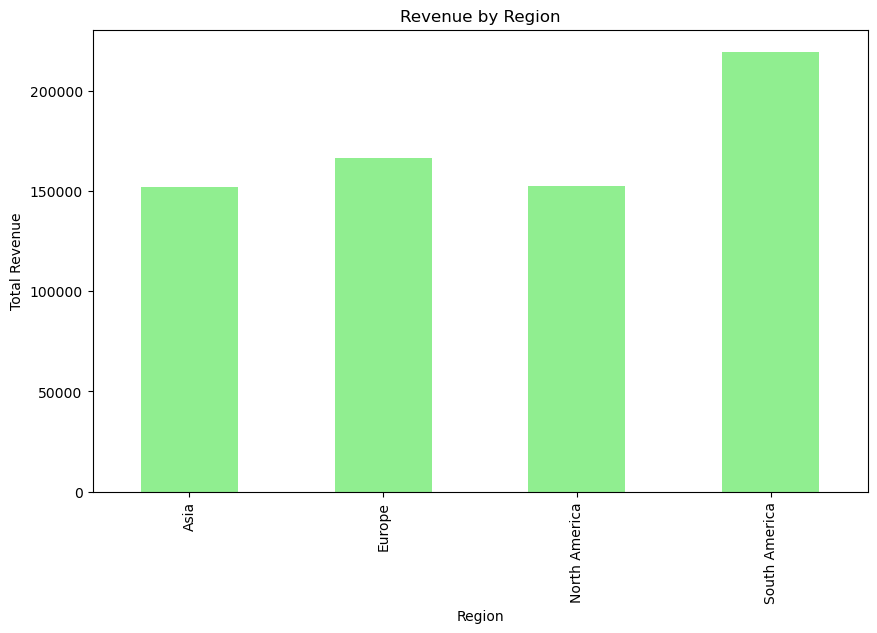

In [49]:
# --- Task 1.7: Visualizations ---
# Visualization for Top-Selling Products
plt.figure(figsize=(10, 6))
plt.bar(top_products.index, top_products.values, color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.ylabel('Quantity Sold')
plt.show()

# Visualization for Revenue by Region
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar', color='lightgreen')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.show()

In [50]:
# --- Task 1.8: Save Insights to PDF ---
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'EDA Business Insights', border=0, ln=1, align='C')
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', size=12)
pdf.cell(0, 10, 'Business Insights:', ln=1)
for insight in insights:
    pdf.multi_cell(0, 10, insight)
pdf.output("Pranav_Pakalapati_EDA.pdf")

''

In [51]:
# --- Task 1.9: Save the EDA script ---
with open("Pranav_Pakalapati_EDA.ipynb", "w") as f:
    f.write("# Pranav_Pakalapati_EDA Notebook")

# Task 2: Lookalike Model

In [17]:
# --- Task 2.1: Import Libraries ---
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [18]:
# --- Task 2.2: Combine Transactions and Products ---
transaction_details = transactions.merge(products, on='ProductID', how='left')
customer_features = transaction_details.merge(customers, on='CustomerID', how='left')

# Print column names to verify
print("Columns in customer_features:", customer_features.columns)

Columns in customer_features: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


In [19]:
# --- Task 2.3: Check for 'Price' Column ---
if 'Price' not in customer_features.columns:
    print("'Price' column not found. Using the available columns for aggregation.")
    features = ['Quantity', 'TotalValue']  # Adjust based on available columns
else:
    features = ['Quantity', 'TotalValue', 'Price']

'Price' column not found. Using the available columns for aggregation.


In [20]:
# --- Task 2.4: Aggregate Necessary Features ---
customer_features_agg = customer_features.groupby('CustomerID')[features].mean().reset_index()

In [21]:
# --- Task 2.5: Scale Features and Compute Cosine Similarity ---
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features_agg[features])

# Compute cosine similarity
similarity_matrix = cosine_similarity(scaled_features)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_features_agg['CustomerID'], columns=customer_features_agg['CustomerID'])

In [22]:
# --- Task 2.6: Get Top 3 Similar Customers ---
lookalike_results = {}
for customer_id in customer_features_agg['CustomerID'].head(20):  # Only consider first 20 customers
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:4]  # Exclude self-similarity
    lookalike_results[customer_id] = [(similar_customer, similar_customers[similar_customer]) for similar_customer in similar_customers.index]

In [43]:
# --- Task 2.7: Save Results to Lookalike.csv ---
lookalike_df = pd.DataFrame.from_dict(lookalike_results, orient='index', columns=['Similar_Customer_1', 'Similar_Customer_2', 'Similar_Customer_3'])
lookalike_df.index.name = 'CustomerID'
lookalike_df.to_csv("Pranav_Pakalapati_Lookalike.csv")

In [44]:
# --- Task 2.8: Save the Lookalike Model script ---
with open("Pranav_Pakalapati_Lookalike.ipynb", "w") as f:
    f.write("# Pranav_Pakalapati_Lookalike Model Notebook")

# Task 3: Customer Segmentation / Clustering

In [25]:
# --- Task 3.1: Import Libraries ---
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [26]:
# --- Task 3.2: Prepare Data for Clustering ---
clustering_features = customer_features_agg.copy()

In [27]:
# --- Task 3.3: Apply KMeans Clustering ---
n_clusters = 4  # You can experiment with 2-10 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustering_features['Cluster'] = kmeans.fit_predict(scaled_features)

In [28]:
# --- Task 3.4: Calculate Clustering Metrics ---
db_index = davies_bouldin_score(scaled_features, clustering_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8491341849647942


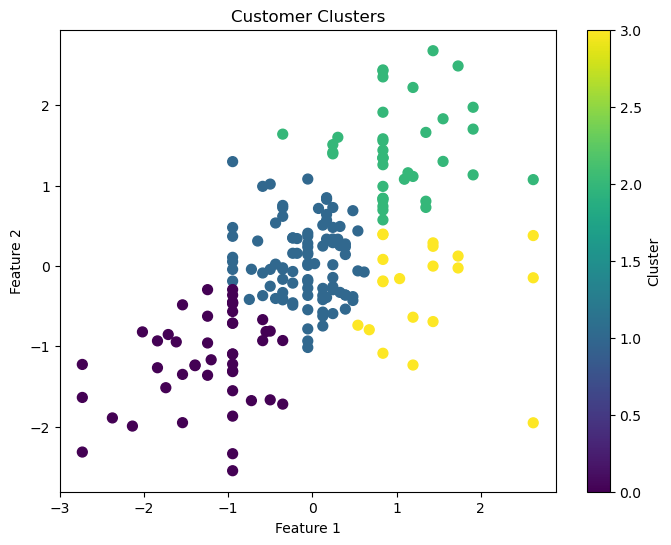

In [29]:
# --- Task 3.5: Visualize Clusters ---
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clustering_features['Cluster'], cmap='viridis', s=50)
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
# --- Task 3.6: Save Clustering Results ---
clustering_features.to_csv("Pranav_Pakalapati_Clustering.csv", index=False)

In [46]:
# --- Task 3.7: Save Clustering Report ---
with open("Clustering.pdf", "w") as f:
    f.write(f"Number of Clusters: {n_clusters}\n")
    f.write(f"Davies-Bouldin Index: {db_index}\n")
    f.write("Clustering metrics and visualizations saved.")

In [47]:
# --- Task 3.8: Save the Clustering script ---
with open("Pranav_Pakalapati_Clustering.ipynb", "w") as f:
    f.write("# Pranav_Pakalapati_Clustering Notebook")